**REGRESIÓN**

*Actividad de transferencia*

En este notebook se presenta un modelo predictivo deel precio de un seguro médico dadas las características del cliente.
Se utiliza un dataset que se encuentra en el enlace siguiente: https://www.kaggle.com/datasets/mirichoi0218/insurance
Para el proposito del trabajo, se habia descargado a nivel local de la computadora.

**1. **Carga del dataset "insurance"****

A continuación se presenta el código para cargar la tabla de datos en un DataFrame y mostrar las 5 primeras observaciones.

In [24]:
# Importar la libreria pandas
import pandas as pd
# Carga del conjunto de datos en un DataFrame
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**2. Elección y justificación de variables predictoras**
   
Para modelar el precio del seguro, es importante entender cómo cada variable puede influir en el costo. Basando en las variables disponibles en la tabla de datos, decidi elegir las seis, es decir: edad (age), genero (sex), indice de masa corporal (bmi), numero de ninos (children), estatus de fumador (smoker), y la region de residencia (region).

> El cuadro siguiente resume mi justificación y explicación de por qué las siguientes variables están relacionadas con el precio del seguro:
> 
| Variable | Justificación |
| --- | --- |
| Edad (age) | La edad es una variable crucial en la predicción del precio del seguro porque los riesgos asociados con la salud cambian con la edad. Las personas más jóvenes tienden a tener menos problemas de salud, mientras que las personas mayores pueden tener más enfermedades crónicas y, por lo tanto, mayores costos de seguro. |
| Sexo (sex) | El sexo puede influir en el precio del seguro debido a diferencias en la esperanza de vida y la incidencia de ciertas enfermedades entre hombres y mujeres. Por ejemplo, las mujeres pueden tener costos de seguro diferentes a los hombres debido a factores como el embarazo y ciertas enfermedades que afectan más a un sexo que a otro. |
| Índice de Masa Corporal (bmi) | El BMI es un indicador de si una persona tiene un peso saludable. Un BMI alto puede estar asociado con un mayor riesgo de enfermedades como la diabetes y enfermedades cardíacas, lo que podría aumentar los costos de seguro. |
| Número de hijos (children) | Tener hijos puede influir en el costo del seguro debido a la necesidad de cubrir a más personas bajo la misma póliza. Además, la presencia de hijos puede cambiar los patrones de uso de los servicios de salud. |
| Estado de fumador (smoker) | Fumar es un factor de riesgo importante para muchas enfermedades graves, como el cáncer y enfermedades respiratorias. Los fumadores tienen un riesgo mucho mayor de tener problemas de salud, lo que se traduce en mayores costos para el seguro. |
| Región (region) | El lugar donde vive una persona puede afectar los costos del seguro debido a variaciones en el costo de la atención médica, las políticas locales de seguro y los riesgos ambientales. Por ejemplo, vivir en una región con altos costos médicos o con mayores riesgos de ciertos tipos de enfermedades puede aumentar el precio del seguro. |


**3.	Separación en variables predictoras y de respuesta.**

A continuación se presenta el código para separar la tabla de datos en variables predictoras y de respuesta.

In [25]:
#Identificación y separación de las variables predictoras y la de respuesta en el dataset
y=data['charges']
X=data.drop(columns=['charges'])

**4.	Separación la tabla de datos en conjunto de entrenamiento y prueba.**

A continuación se presenta el código para separar la tabla de datos en conjunto de entrenamiento y de prueba. Decidi hacerlo 65% -- 35%.

In [38]:
# Importar la libreria sklearn
import sklearn
from sklearn.model_selection import train_test_split
# Separación del conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

**5.	Codificación de las variables categóricas con el método "Mean Encoding"**

A continuación se presenta el código para codificar las variables **'sex, smoker, region'**.

In [39]:
# Mean encoding para codificar la variable genero
female_mean = y_train[X_train['sex']=='male'].mean()
male_mean = y_train[X_train['sex']=='female'].mean()
X_train['sex'] = X_train['sex'].map({'female':female_mean,'male':male_mean})

# Mean encoding para codificar la variable fumador
smoker_no = y_train[X_train['smoker']=='no'].mean()
smoker_yes = y_train[X_train['smoker']=='yes'].mean()
X_train['smoker'] = X_train['smoker'].map({'no':smoker_no,'yes':smoker_yes})

# Mean encoding para codificar la variable region
region_northeast = y_train[X_train['region']=='northeast'].mean()
region_southwest = y_train[X_train['region']=='southwest'].mean()
region_southeast = y_train[X_train['region']=='southeast'].mean()
region_northwest = y_train[X_train['region']=='northwest'].mean()
X_train['region'] = X_train['region'].map({'northeast':region_northeast,'southwest':region_southwest,'southeast':region_southeast,'northwest':region_northwest})

# Mean encoding para codificar los datos de prueba
X_test['sex'] = X_test['sex'].map({'female':female_mean,'male':male_mean})
X_test['smoker'] = X_test['smoker'].map({'no':smoker_no,'yes':smoker_yes})
X_test['region'] = X_test['region'].map({'northeast':region_northeast,'southwest':region_southwest,'southeast':region_southeast,'northwest':region_northwest})

**6.	Entrenamiento de un modelo que prediga el costo de los seguros.**

Utilizamos aqui el algoritmo Random Forest para entrenar el modelo.

In [40]:
# Entrenar o estimar el modelo (Random Forest)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**7. Prediccion del precio de seguro utilizando el conjunto de prueba**

In [41]:
#Para predecir
y_pred = model.predict(X_test)
y_pred

array([ 2206.7867911 , 19717.2664172 , 28768.2557347 , 14120.902121  ,
        6789.8252058 , 43719.972278  ,  9706.2854736 , 15212.5161438 ,
        7708.8136588 ,  6541.5687152 ,  7500.9606747 , 25592.10316   ,
       38449.019057  ,  2359.108758  , 12991.7663259 ,  7211.8166915 ,
       13690.7775365 , 43943.9331664 , 10805.7915466 , 14300.9205153 ,
       14893.7484898 ,  3777.5845709 , 43965.0148519 ,  6871.1866696 ,
       10745.8090563 , 45549.406241  ,  5727.5849664 , 19302.8194595 ,
        3643.4014458 ,  6224.2642064 ,  1602.3948755 ,  6504.2581984 ,
       13669.2256939 ,  2685.0381005 , 10970.2529641 ,  6984.0611628 ,
       11606.6877689 , 10870.8798867 , 15029.4943591 , 10433.1499109 ,
        4704.6834911 , 48367.1875983 , 11059.786463  ,  9670.8744487 ,
        5074.9220056 ,  1941.44591142,  3636.7335045 , 35005.0612808 ,
        6631.2089935 ,  8589.7504435 ,  1333.2146375 ,  3458.9952806 ,
       18997.918728  ,  6730.8043153 ,  6843.2773701 ,  9642.0002964 ,
      

**8. Evaluacion del desempeño con las métricas: MSE, RMSE, MAE.**

Dado que el RMSE y el MAE están en el rango de cientos (segun los resultados mas abajo), mientras que los valores de precio de seguro van desde 1121 hasta 63770, esto indica que el modelo está relativamente bien ajustado y hace predicciones con un margen de error que es pequeño en comparación con la magnitud de los valores de la variable dependiente.

Por otro lado, si nos fijamos en el el RMSE de 68.84, esto sugiere que, en promedio, las predicciones del modelo están a aproximadamente 68.84 unidades de los valores reales. Comparado con el rango de los valores (1121 a 63770), un RMSE de 68.84 parece relativamente pequeño, indicando que el modelo hace predicciones bastante precisas en términos absolutos.

Sin embargo, para una evaluación más completa, sería útil comparar estos resultados con los de otros modelos, como regresión regularizada (Ridge, Lasso), árboles de decisión o regresion de redes neuronales. Esto puede ayudar a determinar si hay un modelo que pueda proporcionar una mejor precisión en las predicciones.

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np

mse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error (MSE) is: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) is: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) is: {mae}")


Mean Squared Error (MSE) is: 4739.014324184828
Root Mean Squared Error (RMSE) is: 68.84049915699934
Mean Absolute Error (MAE) is: 2669.307486139586


C:\Users\JMichel\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Un grafico de dispersión como bono. :)**

Al observar este grafico, podemos decir, en general, el modelo parece capturar la tendencia general de los datos, ya que los puntos rojos (predicciones) siguen un patrón similar a los puntos azules (valores reales). El modelo tiende a subestimar los valores más altos, como se puede ver en la parte superior del gráfico donde los puntos azules suelen estar por encima de los rojos. Esto confirma el valor relativamente alto del MAE (2,669.30), es decir que los errores pueden ser más significativos en valores extremos o específicos del conjunto de datos.

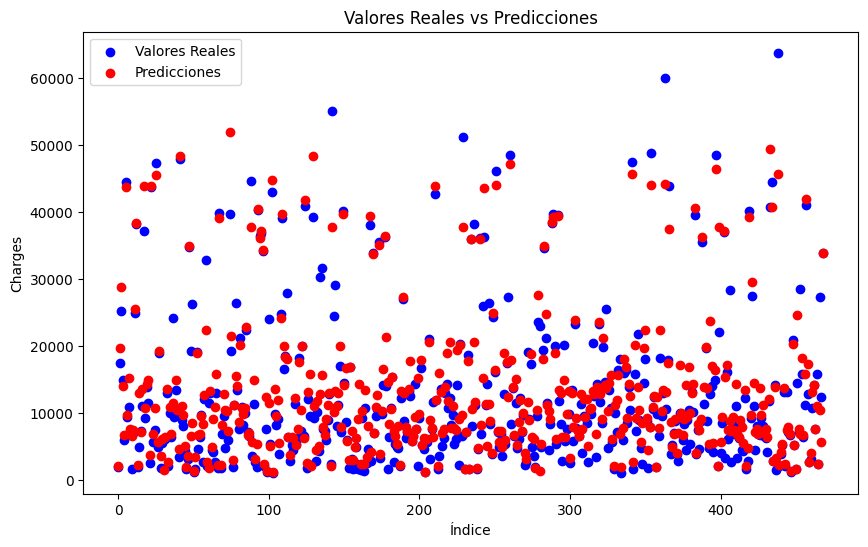

In [43]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reales')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Charges')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()